# 회귀와 분류(Recap)

## 선형 분류

In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn

In [2]:
cancer = load_breast_cancer()

X, y = cancer["data"], cancer["target"]
print(X.shape, y.shape)
## 569명의 데이터(또는 사진 데이터)이고, 30개의 암을 진단하기 위해 사용한 문진 등등의 방법 30개
# (30가지의 항목은 아닐 수 있으니 반드시 원본 데이터 볼 것)

(569, 30) (569,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모양을 반드시 확인해 보라. 여기까지가 전처리하는 것까지 / 베이스 라인 처리
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [4]:
# 분류모델 작업
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [5]:
y_pred = knn.predict(X_test)
print(knn.score(X_train,y_train)) # 학습 데이터
print(np.mean(y_pred == y_test)) # 예측 데이터

0.9406593406593406
0.956140350877193


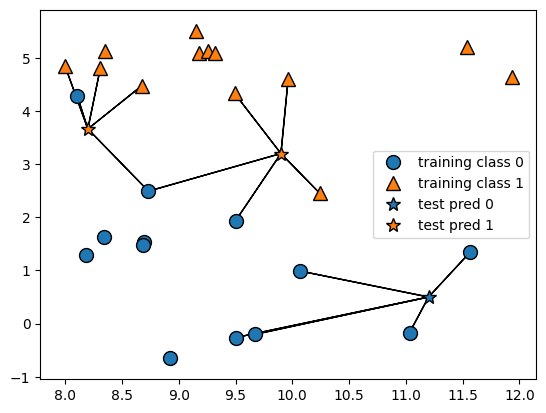

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors = 5) 
# 3 또는 5를 쓰는데, 요즘은 5가 디폴트 값임.
# auto를 써라. 데이터 양에 따라 적당히 잡아 짐.
# 특징 개수가 30차원 이상일 경우 balltree
# 특징 개수가 10차원 이하의 경우 KDTree 쓰면 됨 

## 선형 모델 (L1, L2 규제)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [8]:
cancer = load_breast_cancer()

X, y = cancer["data"], cancer["target"]
print(X.shape, y.shape)
## 569명의 데이터(또는 사진 데이터)이고, 30개의 암을 진단하기 위해 사용한 문진 등등의 방법 30개
# (30가지의 항목은 아닐 수 있으니 반드시 원본 데이터 볼 것)

(569, 30) (569,)


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [11]:
# LogisticRegression -> C를 이용해서 규제 강도 결정
# c는 0되면 안됨, 기울기가 작아짐 / 데이터가 매우 많아 지면, C값을 줄여서 확인해봐.
# 작은 < 1.0 < 큰거
# 강한 규제 < 일반 규제 < 규제를 해제 (과접합에 가까워짐 / 특수한 경우에 사용 - 데이터가 매우 적을 경우)

lr = LogisticRegression(max_iter=5000) #LogisticRegression을 쓴다는 것은 C를 결정하세요 라는 뜻임.
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [12]:
# L2는 일반화 성능에 관심이 있으면 L2를 선택하는 경향이 있음 (0을 만들지 않고 작게 하는 것으로 합의를 봄)
# L1는 주요한 특성을 스스로 고려하는 모델의 경우 선택하는 경향이 있음 => 모델을 해석하는데 용이함. (0을 만듦 / 데이터를 가져왔는데 0으로 만들어서 데이터가 소실됨)
# 기울기 해석하는데 굳이 필요 없으니 없애자.. 이런 느낌? # 선형에서 한해서 말하는 것.

models = {
    "OLS" :LogisticRegression(penalty=None, max_iter=5000), # 기울기 값 # 일반적인 선형모델이라는 뜻
    "Ridge(L2)" : LogisticRegression(penalty='l2', solver="lbfgs", max_iter=5000), #규제값 1
    "lasso(L1)" : LogisticRegression(penalty='l1', solver="liblinear", max_iter=5000) #규제값 2
}

In [13]:
result = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    result[name] = auc

c:\Users\user\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 회기

In [14]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [15]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X, y = housing["data"], housing["target"]
print(X.shape, y.shape)

# Restart / run all 눌러서 에러 나는지 확인인

(20640, 8) (20640,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모양을 반드시 확인해 보라. 여기까지가 전처리하는 것까지 / 베이스 라인 처리
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [17]:
# 분류모델 작업
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [18]:
y_pred = knn.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.1186823858768293


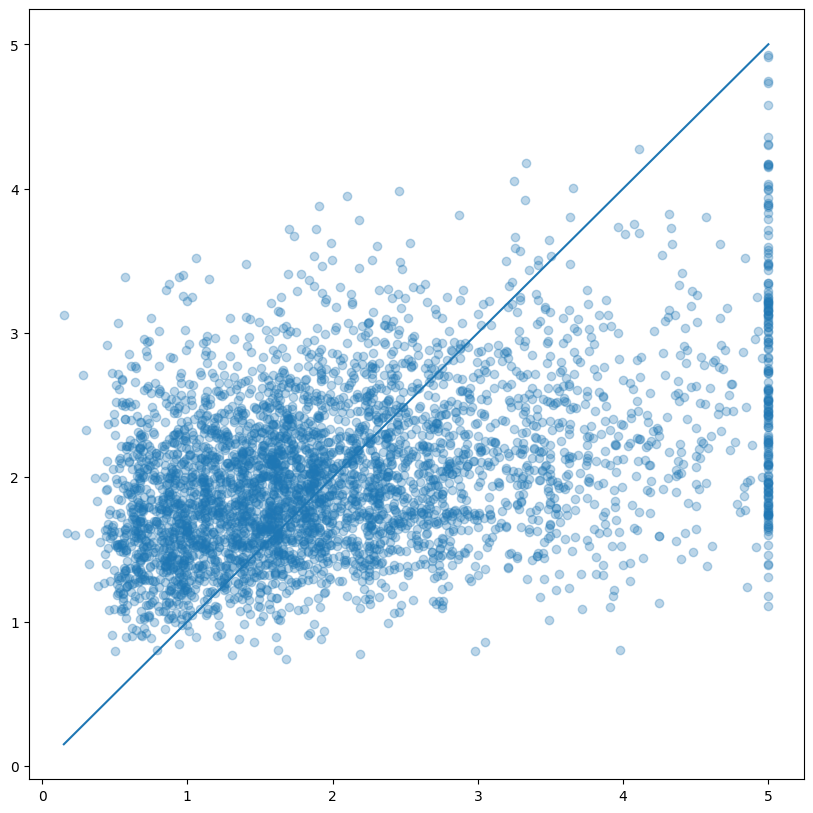

In [19]:

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.gray(); plt.show()

## 회기는 데이터는 면밀하게 살펴보지 않으면, 틀림.
## 단위를 잘 봐야 하며 같은 단위로 만들어 놓아야함.

## naive bayes

- 조건부 확률을 이용해서 어떤 값들을 예측하는 구나. 확률이라는 친구가 머신러닝과 딥러닝에 들어 오는구나 정도 알면 됨.
- 예측이 굉장히 빠름(학습이 빠르다고 하지 않았음) => 사전 확률을 구해 놓기 때문에 빠른 것임.
- 파라미터에 비교적 둔감
- "고차원 희소 데이터에 잘 작동" -> 아마존 판매 데이터 ( 이 고객이 뭐 살 것 같니?)
- 단점 :  선형 모델보다 "항상" 낮은 성능

1. Knn : 비지도 학습
2. baselin 모델 : 선형모델
3. svm, 디시젼 트리 : 회기와 분류를 하나의 알고리즘으로 할 수 있음

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [21]:
cancer = load_breast_cancer()

X, y = cancer["data"], cancer["target"]
print(X.shape, y.shape)
## 569명의 데이터(또는 사진 데이터)이고, 30개의 암을 진단하기 위해 사용한 문진 등등의 방법 30개
# (30가지의 항목은 아닐 수 있으니 반드시 원본 데이터 볼 것)

(569, 30) (569,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [23]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred = gnb.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9736842105263158
